# Ch. 6. Inferring a Binomial Probability via Exact Mathematical Analysis

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import sys
sys.version

'3.8.8 (tags/v3.8.8:024d805, Feb 19 2021, 13:18:16) [MSC v.1928 64 bit (AMD64)]'

## 6.1. The Likelihood function: Bernoulli Distribution
- Bernoulli distribution (PMF)
$$
    p(y|\theta) = \theta^y (1-\theta)^{(1-y)}, \quad y \in \{0, 1\}, \quad \theta \geq 0
$$
- check: 
$$
\sum_{y\in\{0,1\}} p(y|\theta) = 1
$$

### Single Observation
- Given an observation $y$, it is the likelihood function of $\theta$:
$$
    l(\theta) = p(y|\theta) = \theta^y (1-\theta)^{(1-y)}
$$
    - remember this is not a pdf.
- In case $y=1$, $l(\theta) = \theta$.

### Multiple Observations
$$
    l(\theta) = p(y_1,\ldots,y_n|\theta) = \prod_i p(y_i|\theta) = \theta^z (1-\theta)^{n-z}\quad
$$
where
$$
    z = \sum_i y_i 
$$
is the number of events each of which has $1$ as the observation.

## 6.2 Prior Distribution: Beta distribution
- beta distr.
$$
    p(\theta|a,b) = \frac{\theta^{a-1} (1-\theta)^{b-1}}{B(a,b)}, \quad a,b > 0
$$
- beta function
$$
    B(a,b) = \int_0^1  \theta^{a-1} (1-\theta)^{b-1}  d\theta
$$
- The variables $a$ and $b$ are called the **shape parameters**:

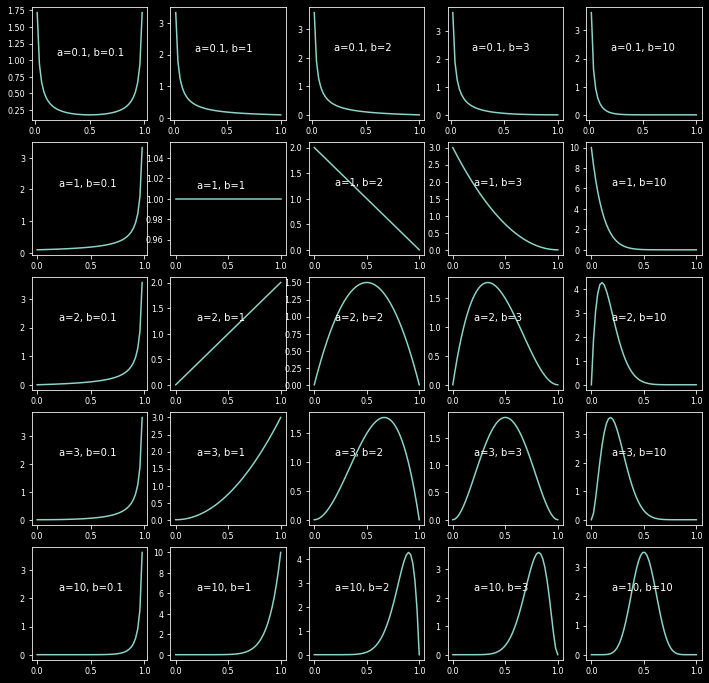

In [9]:
## Beta distribution
alphas = [0.1, 1, 2, 3, 10]
betas = [0.1, 1, 2, 3, 10]
p = np.linspace(0, 1, 50)
fig, axes = plt.subplots(5, 5, figsize=(12,12))
for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        ax = axes[i,j]
        ax.plot(p, stats.beta(a,b).pdf(p))
        ax.tick_params(labelsize=8)
        if a==1 and b==1:
            ax.text(0.2, 1.01, f'a={a}, b={b}')            
        else:
            ax.text(0.2, ax.get_ylim()[1]*.6, f'a={a}, b={b}')


### 6.2.1. Specifying a beta prior
- $a$, $b$: corresponds to the number of 0's and 1's, respectively.
- central tendency, sample size, an concentration
- central tendency:
\begin{align}
    \mu &= \frac{a}{a+b} \quad\mbox{mean}\\
    \omega &= \frac{a-1}{a+b-2}\quad a,b>1\quad\mbox{mode}
\end{align}    
- concentration $\kappa$: the spread of the distr.
$$
    \kappa = a + b
$$
- conversion to $a$, $b$:
$$
    a = \mu \kappa\quad b = (1-\mu)\kappa \\
    a = \omega (\kappa-2) + 1\quad b = (1-\omega)(\kappa-2) + 1 \quad \kappa > 2
$$

In [21]:
def betaABfromMeanKappa(mean, kappa):
    return mean*kappa, (1-mean)*kappa
#
def betaABfromModeKappa(mode, kappa):
    assert kappa >= 2
    return mode*(kappa-2) + 1, (1-mode)*(kappa-2) + 1

In [22]:
betaABfromModeKappa(.5, 2)

(1.0, 1.0)